In [25]:
import pandas as pd

df_common = pd.read_csv(r"C:\Users\lucas\OneDrive\Escritorio\Csv de nba\common_player_info.csv")


In [26]:
df_common.head()

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,...,HISTADD_zaid_abdul-aziz,1968.0,1977.0,N,Y,Y,1968,1,5,N
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,HISTADD_frosty_able,1956.0,1956.0,N,Y,Y,1956,NaN,NaN,N


In [27]:
import pandas as pd

# Crear la columna years_active
df_common['years_active'] = df_common['to_year'] - df_common['from_year']
df_common['years_active'] = df_common['years_active'] + 1

# Contar frecuencia de cada valor de years_active
df_summary = df_common['years_active'].value_counts().reset_index()
df_summary.columns = ['years_active', 'count']

# Ordenar por years_active (opcional)
df_summary = df_summary.sort_values(by='years_active').reset_index(drop=True)

print(df_summary)


    years_active  count
0            1.0    901
1            2.0    459
2            3.0    346
3            4.0    267
4            5.0    221
5            6.0    170
6            7.0    187
7            8.0    153
8            9.0    155
9           10.0    152
10          11.0    149
11          12.0    116
12          13.0    108
13          14.0     82
14          15.0     51
15          16.0     36
16          17.0     32
17          18.0     20
18          19.0     15
19          20.0      3
20          21.0      5
21          22.0      1
22          23.0      1
23          25.0      1
24          56.0      1


In [38]:
# Registrando Outliers
# Filtrar filas donde years_active sea 55
registro_55 = df_common[df_common['years_active'] == 56.0]

# Mostrar el resultado
print(registro_55)


     person_id first_name last_name display_first_last  \
146      76114      Ernie   Barrett      Ernie Barrett   

    display_last_comma_first display_fi_last    player_slug  \
146           Barrett, Ernie      E. Barrett  ernie-barrett   

               birthdate        school country  ... to_year dleague_flag  \
146  1929-08-27 00:00:00  Kansas State     USA  ...  2008.0            N   

     nba_flag  games_played_flag draft_year draft_round draft_number  \
146         Y                  Y       1951           1            7   

    greatest_75_flag  years_active década  
146                N          56.0  1950s  

[1 rows x 35 columns]


In [ ]:
# Eliminar filas donde years_active sea 55
df_common = df_common[df_common['years_active'] != 56.0]

# Reiniciar índices (opcional)
df_common = df_common.reset_index(drop=True)


In [39]:
# Obtener el valor máximo de to_year y el mínimo de from_year
max_to_year = df_common['to_year'].max()
min_from_year = df_common['from_year'].min()

# Calcular la diferencia
years_span = max_to_year - min_from_year

print("Diferencia entre max(to_year) y min(from_year):", years_span)


Diferencia entre max(to_year) y min(from_year): 77.0


In [40]:
# Obtener el mínimo y máximo
min_from_year = df_common['from_year'].min()
max_to_year = df_common['to_year'].max()
print(min_from_year)
print(max_to_year)


1946.0
2023.0


In [44]:
import pandas as pd

# ------------------------------------------------
# 1️⃣ Crear columna years_active
# ------------------------------------------------
df_common['years_active'] = df_common['to_year'] - df_common['from_year']

# ------------------------------------------------
# 2️⃣ Función para calcular década según tus criterios
# ------------------------------------------------
def calcular_decada(row):
    from_year = int(row['from_year'])
    years_active = int(row['years_active'])
    
    # Determinar límite del periodo
    if 1 <= years_active <= 9:
        fin_periodo = from_year + years_active - 1
    else:  # 10 o más años
        fin_periodo = from_year + 9
    
    # Lista de años jugados en el periodo
    años = list(range(from_year, fin_periodo + 1))
    
    # Contar cuántos años caen en cada década
    decadas = {}
    for año in años:
        decada = (año // 10) * 10
        decadas[decada] = decadas.get(decada, 0) + 1
    
    # Buscar década con más años
    max_anos = max(decadas.values())
    decadas_max = [d for d, c in decadas.items() if c == max_anos]
    
    # Elegir la primera década en caso de empate
    decada_principal = min(decadas_max)
    return f"{decada_principal}s"

# ------------------------------------------------
# 3️⃣ Crear columna 'decada' en df_common
# ------------------------------------------------
df_common['decada'] = df_common.apply(calcular_decada, axis=1)

# ------------------------------------------------
# 4️⃣ Ver resultados
# ------------------------------------------------
print(df_common[['person_id', 'from_year', 'to_year', 'years_active', 'decada']].head())



   person_id  from_year  to_year  years_active decada
0      76001     1990.0   1994.0           4.0  1990s
1      76002     1968.0   1977.0           9.0  1970s
2      76003     1969.0   1988.0          19.0  1970s
3        949     1996.0   2007.0          11.0  2000s
4      76006     1956.0   1956.0           0.0  1960s


In [45]:
# Contar cantidad de registros por década
df_decada_summary = df_common['decada'].value_counts().reset_index()
df_decada_summary.columns = ['decada', 'count']

# Ordenar por década de forma ascendente
df_decada_summary['decada_num'] = df_decada_summary['decada'].str[:-1].astype(int)  # Quitar la "s" y pasar a int
df_decada_summary = df_decada_summary.sort_values(by='decada_num').drop(columns='decada_num').reset_index(drop=True)

# Ver resultado
print(df_decada_summary)


  decada  count
0  1940s    123
1  1950s    352
2  1960s    198
3  1970s    398
4  1980s    479
5  1990s    514
6  2000s    511
7  2010s    648
8  2020s    409


In [47]:
df_combine = pd.read_csv("C:/Users/lucas/OneDrive/Escritorio/Csv de nba/draft_combine_stats.csv")



In [48]:
df_combine.head()

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2000,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,12131,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Seleccionar las columnas que queremos de cada DataFrame
cols_common = ['person_id', 'display_last_comma_first', 'birthdate', 'from_year', 'to_year', 'decada']
cols_combine = ['player_id', 'position', 'height_wo_shoes', 'weight', 'wingspan', 'standing_reach', 'body_fat_pct', 'max_vertical_leap']

# Hacer merge usando person_id y player_id
df_merged = pd.merge(
    df_common[cols_common],          # columnas de df_common
    df_combine[cols_combine],        # columnas de df_combine
    left_on='person_id',             # columna de df_common
    right_on='player_id',            # columna de df_combine
    how='inner'                      # inner join: solo filas que existan en ambos
)

# Opcional: eliminar la columna 'player_id' porque es redundante
df_merged = df_merged.drop(columns=['player_id'])

# Verificar resultado
print(df_merged.head())


   person_id display_last_comma_first            birthdate  from_year  \
0    1630173        Achiuwa, Precious  1999-09-19 00:00:00     2020.0   
1     203112              Acy, Quincy  1990-10-06 00:00:00     2012.0   
2     203500            Adams, Steven  1993-07-20 00:00:00     2013.0   
3    1630534            Agbaji, Ochai  2000-04-20 00:00:00     2022.0   
4    1630534            Agbaji, Ochai  2000-04-20 00:00:00     2022.0   

   to_year decada position  height_wo_shoes  weight  wingspan  standing_reach  \
0   2023.0  2020s       PF            79.50   234.0     84.75           108.5   
1   2018.0  2010s       PF            78.50   223.8     86.75           106.5   
2   2023.0  2010s        C            82.75   254.5     88.50           109.5   
3   2023.0  2020s       SG            76.50   214.4     82.00           103.5   
4   2023.0  2020s       SG            76.50   216.8     82.25           104.0   

   body_fat_pct  max_vertical_leap  
0          6.70                NaN  


In [50]:
# Contar jugadores por posición
df_positions_count = df_merged.groupby('position').size().reset_index(name='num_jugadores')

# Mostrar resultado
print(df_positions_count)


   position  num_jugadores
0         C             63
1      C-PF             21
2        PF            144
3      PF-C             45
4     PF-SF             19
5        PG            134
6     PG-SG             28
7        SF             88
8     SF-PF             28
9     SF-SG             21
10       SG            132
11    SG-PG             22
12    SG-SF             51


In [52]:
# Tomar solo la primera posición antes del guion
df_merged['position'] = df_merged['position'].str.split('-').str[0].str.strip()

# Verificar
print(df_merged['position'].unique())

# Contar jugadores por posición
df_positions_count = df_merged.groupby('position').size().reset_index(name='num_jugadores')
print(df_positions_count)


['PF' 'C' 'SG' 'SF' 'PG' nan]
  position  num_jugadores
0        C             84
1       PF            208
2       PG            162
3       SF            137
4       SG            205


In [53]:
df_merged.head()

,person_id,display_last_comma_first,birthdate,from_year,to_year,decada,position,height_wo_shoes,weight,wingspan,standing_reach,body_fat_pct,max_vertical_leap
0,1630173,"Achiuwa, Precious",1999-09-19 00:00:00,2020.0,2023.0,2020s,PF,79.50,234.0,84.75,108.5,6.70,NaN
1,203112,"Acy, Quincy",1990-10-06 00:00:00,2012.0,2018.0,2010s,PF,78.50,223.8,86.75,106.5,7.10,37.0
2,203500,"Adams, Steven",1993-07-20 00:00:00,2013.0,2023.0,2010s,C,82.75,254.5,88.50,109.5,6.65,33.0
3,1630534,"Agbaji, Ochai",2000-04-20 00:00:00,2022.0,2023.0,2020s,SG,76.50,214.4,82.00,103.5,4.15,41.5
4,1630534,"Agbaji, Ochai",2000-04-20 00:00:00,2022.0,2023.0,2020s,SG,76.50,216.8,82.25,104.0,5.40,39.0


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por 'decada' y calcular promedio de 'height_wo_shoes'
avg_height_by_decade = df_merged.groupby('decada')['height_wo_shoes'].mean().reset_index()

# Renombrar columna para claridad
avg_height_by_decade.rename(columns={'height_wo_shoes': 'promedio_height'}, inplace=True)

print(avg_height_by_decade)


  decada  promedio_height
0  1990s        75.250000
1  2000s        77.713415
2  2010s        77.405634
3  2020s        77.489336


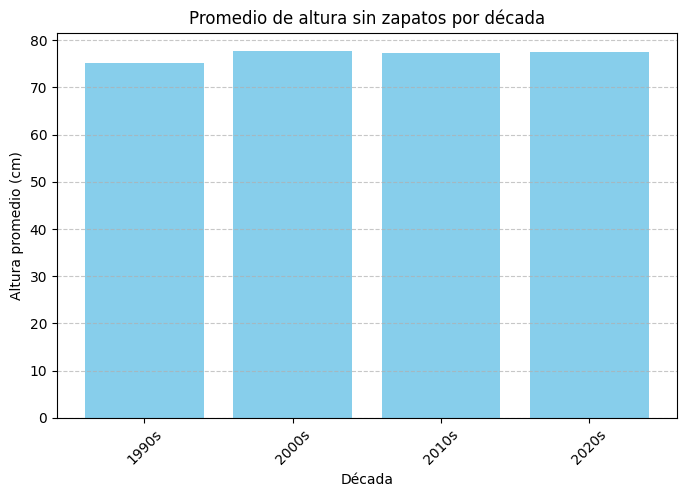

In [55]:
# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(avg_height_by_decade['decada'], avg_height_by_decade['promedio_height'], color='skyblue')
plt.xlabel('Década')
plt.ylabel('Altura promedio (cm)')
plt.title('Promedio de altura sin zapatos por década')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por decada y position, calculando la altura promedio
height_by_decade_position = (
    df_merged.groupby(['decada', 'position'])['height_wo_shoes']
    .mean()
    .reset_index()
)

# Renombrar columna para mayor claridad
height_by_decade_position.rename(columns={'height_wo_shoes': 'promedio_height'}, inplace=True)

print(height_by_decade_position.head(10))


  decada position  promedio_height
0  1990s       SG        75.250000
1  2000s        C        82.895833
2  2000s       PF        80.039474
3  2000s       PG        72.604651
4  2000s       SF        78.729730
5  2000s       SG        75.930233
6  2010s        C        82.443548
7  2010s       PF        80.360825
8  2010s       PG        73.106250
9  2010s       SF        78.219828


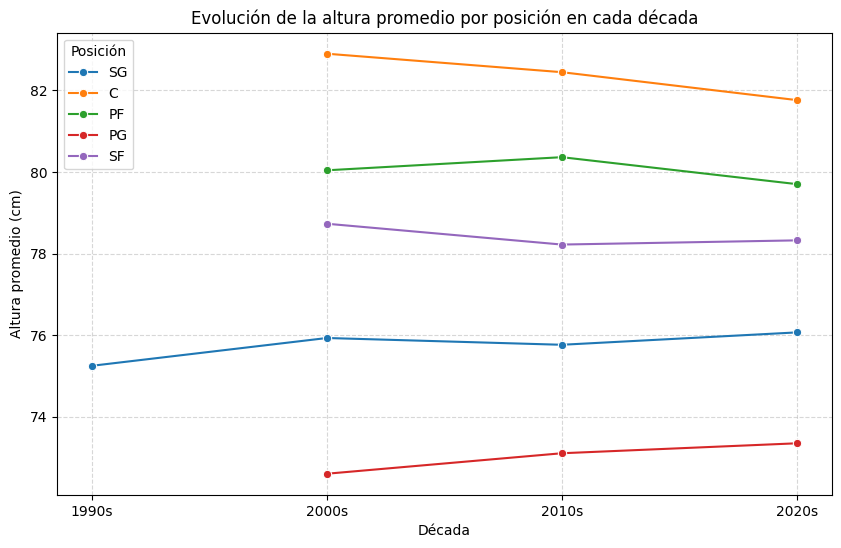

In [57]:
plt.figure(figsize=(10,6))

# Gráfico de líneas, cada posición es una línea diferente
sns.lineplot(
    data=height_by_decade_position,
    x='decada',
    y='promedio_height',
    hue='position',
    marker='o'
)

plt.title('Evolución de la altura promedio por posición en cada década')
plt.xlabel('Década')
plt.ylabel('Altura promedio (cm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Posición')
plt.show()


In [58]:
# Agrupar por decada y position, calculando el body_fat_pct promedio
bodyfat_by_decade_position = (
    df_merged.groupby(['decada', 'position'])['body_fat_pct']
    .mean()
    .reset_index()
)

# Renombrar columna para mayor claridad
bodyfat_by_decade_position.rename(columns={'body_fat_pct': 'promedio_bodyfat'}, inplace=True)

print(bodyfat_by_decade_position.head(10))


  decada position  promedio_bodyfat
0  1990s       SG          5.300000
1  2000s        C         10.436842
2  2000s       PF          9.328571
3  2000s       PG          7.159091
4  2000s       SF          7.417391
5  2000s       SG          6.844828
6  2010s        C          7.192188
7  2010s       PF          8.533684
8  2010s       PG          5.957692
9  2010s       SF          6.613393


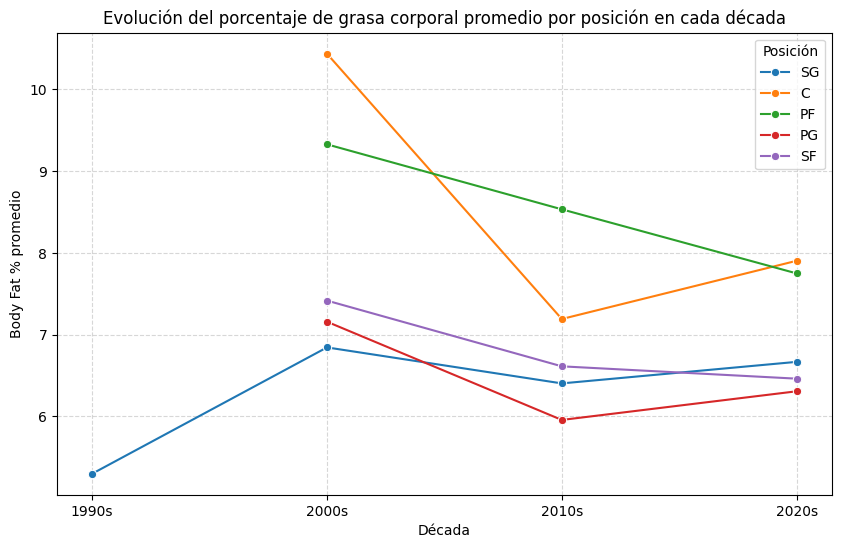

In [59]:
plt.figure(figsize=(10,6))

# Gráfico de líneas, cada posición es una línea diferente
sns.lineplot(
    data=bodyfat_by_decade_position,
    x='decada',
    y='promedio_bodyfat',
    hue='position',
    marker='o'
)

plt.title('Evolución del porcentaje de grasa corporal promedio por posición en cada década')
plt.xlabel('Década')
plt.ylabel('Body Fat % promedio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Posición')
plt.show()


In [60]:
# Filtrar por década y posición
pg_90s = df_merged[(df_merged['decada'] == '1990s') & (df_merged['position'] == 'PG')]

# Contar jugadores
num_pg_90s = pg_90s.shape[0]

print(f"Cantidad de PG en los 90s: {num_pg_90s}")

# Opcional: crear un DataFrame con los jugadores
df_pg_90s = pg_90s[['person_id', 'display_last_comma_first', 'from_year', 'to_year', 'decada', 'height_wo_shoes', 'weight']]
print(df_pg_90s.head())


Cantidad de PG en los 90s: 0
Empty DataFrame
Columns: [person_id, display_last_comma_first, from_year, to_year, decada, height_wo_shoes, weight]
Index: []


In [63]:
# Filtrar solo jugadores de la década de los 90s
df_90s = df_merged[df_merged['decada'] == '1990s']

# Verificar resultado
print(df_90s.head())
print(f"Número de jugadores en los 90s: {df_90s.shape[0]}")
print (df_90s.head())


     person_id display_last_comma_first            birthdate  from_year  \
766        199         Williams, Reggie  1964-03-05 00:00:00     1987.0   

     to_year decada position  height_wo_shoes  weight  wingspan  \
766   1996.0  1990s       SG            75.25   199.0     81.25   

     standing_reach  body_fat_pct  max_vertical_leap  
766           103.0           5.3               36.5  
Número de jugadores en los 90s: 1
     person_id display_last_comma_first            birthdate  from_year  \
766        199         Williams, Reggie  1964-03-05 00:00:00     1987.0   

     to_year decada position  height_wo_shoes  weight  wingspan  \
766   1996.0  1990s       SG            75.25   199.0     81.25   

     standing_reach  body_fat_pct  max_vertical_leap  
766           103.0           5.3               36.5  
